## **About Aweshome**

Aweshome is a chatbot created by implementing machine learning in it. Its manufacture is carried out as an additional feature that will complement the smart home application created that also called Aweshome.
This application has a motto:

***Aweshome: Make your home smart and awesome ***

The chatbot feature will help users explicitly manage the appliances in their house, as well as to know the condition of their house.

# **Steps to create Aweshome Chatbot**

The following is an overview of the steps taken to create an Aweshome chatbot:
1. Prepare the required packages, including the Deep Learning, Tensorflow, Keras, Pickle, and NLTK (Natural Language Processing Toolkit) libraries.
2. Prepare a dataset in the form of a collection of user input and output that must be displayed in response to the Aweshome chatbot. The file is saved in JSON type and is named "intents."
3. Perform data preparation including import required packages, load the JSON file and extract the required data.
4. Creating models including training and testing models.
5. Integrating Aweshome chatbot with application.



In [ ]:
#code for import the packages
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
#code for import the dataset that have been created in JSON format
with open('intents.json') as content:
  data1 = json.load(content)

In [ ]:
#code for getting all the data to lists
tags = []
patterns = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    patterns.append(lines)
    tags.append(intent['tag'])

In [ ]:
#code for convert the data to dataframe
data = pd.DataFrame({"inputs":patterns,
                     "tags":tags})

In [ ]:
#code for print the data and get data sample
data
data = data.sample(frac=1)

In [ ]:
#code for remove punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
122,lampunya sudah dimatikan,lampu_mati
221,keluarkan jemurannya sekarang,jemuran_keluar
161,buat pintu menjadi terbuka sekarang,pintu_buka
53,bagaimana kondisi kompor gas di rumah saat ini,kondisi_rumah
170,bagaimana kondisi pintu saat ini tolong ditutup,pintu_tutup
...,...,...
216,keluarkan jemurannya,jemuran_keluar
77,sembah nuwun,terima_kasih
10,cek,salam1
217,apakah sedang turun hujan jemurannya tolong di...,jemuran_keluar


In [ ]:
#code for tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#code for apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#code for encode the outputs
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(data['tags'])

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [ ]:
#code for define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = lbl_encoder.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  195
output length:  14


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import string
import random

def chat(user_text, kondisiRumah_array):
  texts_p = []
  kondisiLampu = kondisiRumah_array[0] 
  kondisiPintu = kondisiRumah_array[1] 
  kondisiJemuran = kondisiRumah_array[2] 
  kondisiGas = kondisiRumah_array[3] 
  # Check kondisi lampu
  if kondisiLampu==False:
    kondisiLampu='mati'
  else:
    kondisiLampu='nyala'
    # Check kondisi pintu
  if kondisiPintu==False:
    kondisiPintu='terbuka'
  else:
    kondisiPintu='terkunci'
  # Check kondisi jemuran
  if kondisiJemuran==False:
    kondisiJemuran='kehujanan'
  else:
    kondisiJemuran='aman'
  # Check kondisi gas
  if kondisiGas==False:
    kondisiGas='mati'
  else:
    kondisiGas='nyala'

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in user_text if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = lbl_encoder.inverse_transform([output])[0]

  #finding the right tag and predicting
  response_tag = lbl_encoder.inverse_transform([output])[0]
  if response_tag == "perpisahan":
    print("Aweshome : ",random.choice(responses['perpisahan']))
  elif response_tag == "kondisi_rumah":
    #lampu, pintu, jemuran, gas = getSensor()
    kondisiRumah = []
    print("Aweshome: kondisi lampu", kondisiLampu, "kondisi pintu", kondisiPintu, "kondisi jemuran", kondisiJemuran, "kondisi gas", kondisiGas)
    text = input("You: ")
    chat(text, kondisiRumah_array)
  else:
    print("Aweshome : ",random.choice(responses[response_tag]))
    text = input("You: ")
    chat(text, kondisiRumah_array) 

In [ ]:
#code for create the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(12,return_sequences=True)(x)
x = LSTM(12,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = tf.keras.Model(i,x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 11, 10)            1960      
                                                                 
 lstm_4 (LSTM)               (None, 11, 12)            1104      
                                                                 
 lstm_5 (LSTM)               (None, 11, 12)            1200      
                                                                 
 flatten_2 (Flatten)         (None, 132)               0         
                                                                 
 dense_2 (Dense)             (None, 14)                1862      
                                                                 
Total params: 6,126
Trainable params: 6,126
Non-trainable p

In [ ]:
#code for compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#code for train the model
train = model.fit(x_train,y_train,epochs=500)

Epoch 1/500
8/8 [==============================] - 4s 14ms/step - loss: 2.6359 - accuracy: 0.0798
Epoch 2/500
8/8 [==============================] - 0s 13ms/step - loss: 2.6252 - accuracy: 0.1218
Epoch 3/500
8/8 [==============================] - 0s 13ms/step - loss: 2.6093 - accuracy: 0.1218
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 2.5837 - accuracy: 0.1218
Epoch 5/500
8/8 [==============================] - 0s 13ms/step - loss: 2.5486 - accuracy: 0.1218
Epoch 6/500
8/8 [==============================] - 0s 23ms/step - loss: 2.5112 - accuracy: 0.1303
Epoch 7/500
8/8 [==============================] - 0s 22ms/step - loss: 2.5096 - accuracy: 0.1387
Epoch 8/500
8/8 [==============================] - 0s 20ms/step - loss: 2.4984 - accuracy: 0.1387
Epoch 9/500
8/8 [==============================] - 0s 21ms/step - loss: 2.4949 - accuracy: 0.1387
Epoch 10/500
8/8 [==============================] - 0s 20ms/step - loss: 2.4901 - accuracy: 0.1387
Epoch 11/500
8/8 [=

Text(0.5, 1.0, 'Training Accuracy Model')

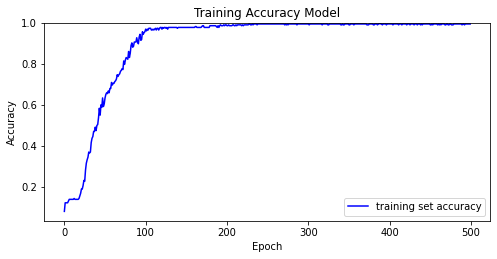

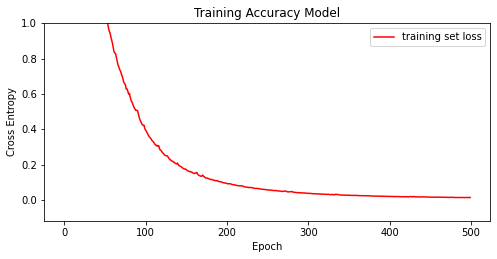

In [ ]:
#code for plot accuracy model
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train.history['accuracy'],label='training set accuracy',color='blue')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy Model')

#code for plot loss model
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train.history['loss'],label='training set loss',color='red')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy Model')


In [ ]:
#code for save the model
model.save("chat_model")
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)  

with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


INFO:tensorflow:Assets written to: chat_model/assets


In [ ]:
# code for save model to h5 format 
model.save('./model.h5')

In [ ]:
# Code for save to tflite format
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()
open('model.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpwwbxhq9p/assets


INFO:tensorflow:Assets written to: /tmp/tmpwwbxhq9p/assets


31008

In [ ]:
from nltk.metrics import *
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 


8/8 [==============================] - 0s 13ms/step - loss: 0.0134 - accuracy: 0.9958


INFO:tensorflow:Assets written to: ram://66d2531d-eaed-45ac-aaa0-528ba6d63358/assets


INFO:tensorflow:Assets written to: ram://66d2531d-eaed-45ac-aaa0-528ba6d63358/assets


In [ ]:
from nltk.metrics import *
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 

8/8 [==============================] - 0s 27ms/step - loss: 0.0137 - accuracy: 0.9958


INFO:tensorflow:Assets written to: ram://dd7b9c57-9130-48b5-82b1-e1c12f01e11d/assets


INFO:tensorflow:Assets written to: ram://dd7b9c57-9130-48b5-82b1-e1c12f01e11d/assets


In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[ 1 11] <class 'numpy.float32'>

1 output(s):
[ 1 14] <class 'numpy.float32'>


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import string
import random

def chat(user_text, kondisiRumah_array):
  texts_p = []
  kondisiLampu = kondisiRumah_array[0] 
  kondisiPintu = kondisiRumah_array[1] 
  kondisiJemuran = kondisiRumah_array[2] 
  kondisiGas = kondisiRumah_array[3] 
  # Check kondisi lampu
  if kondisiLampu==False:
    kondisiLampu='mati'
  else:
    kondisiLampu='nyala'
    # Check kondisi pintu
  if kondisiPintu==False:
    kondisiPintu='terbuka'
  else:
    kondisiPintu='terkunci'
  # Check kondisi jemuran
  if kondisiJemuran==False:
    kondisiJemuran='kehujanan'
  else:
    kondisiJemuran='aman'
  # Check kondisi gas
  if kondisiGas==False:
    kondisiGas='mati'
  else:
    kondisiGas='nyala'

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in user_text if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = lbl_encoder.inverse_transform([output])[0]

  #finding the right tag and predicting
  response_tag = lbl_encoder.inverse_transform([output])[0]
  if response_tag == "perpisahan":
    print("Aweshome : ",random.choice(responses['perpisahan']))
  elif response_tag == "kondisi_rumah":
    #lampu, pintu, jemuran, gas = getSensor()
    kondisiRumah = []
    print("Aweshome: kondisi lampu", kondisiLampu, ", kondisi pintu", kondisiPintu, ", kondisi jemuran", kondisiJemuran, ", dan kondisi gas", kondisiGas)
    text = input("You: ")
    chat(text, kondisiRumah_array)
  else:
    print("Aweshome : ",random.choice(responses[response_tag]))
    text = input("You: ")
    chat(text, kondisiRumah_array) 

In [ ]:
inp = input("You: ")
kondisi = [False, False, True, False]
chat(inp, kondisi)

You: bagaimana kondisi lampu saat ini
Aweshome: kondisi lampu mati , kondisi pintu terbuka , kondisi jemuran aman , dan kondisi gas mati
You: bye
Aweshome :  Sampai jumpa
